l dan m parameters that giving traffic/utility value of $\rho$ = 0,8. In this terms, i assume that value of $\lambda$ = 0.8 dan $\mu$ = 1.\
l = lambda\
m = mu\
p = rho

IAT = InterArrival Time\
JQAT = Join Queue At Time\
ST = Service Time\
GSAT = Get Service At Time\
LSAT = Leave Server At Time\
TSIS = Time Spent in System\
TSIQ = Time Spent in Queue


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
N = 9999
l = 8
m = 10
p = l/m

In [3]:
En_theory = l*((1/m)+(p/(2*m*(1-p))))

In [4]:
En_theory

2.4000000000000004

In [5]:
def generate_random(x):
  return -(1/x)*np.log(np.random.rand())

In [6]:
IAT = [0]
ST = [0]
for i in range(N):
  a = generate_random(l)
  b = 1/m
  IAT.append(a)
  ST.append(b)

In [7]:
JQAT = [0]
for i in range(1, N+1):
  a = IAT[i] + JQAT[i-1]
  JQAT.append(a)

In [8]:
LSAT = [0]
GSAT = [0]
if LSAT[0] < JQAT[1]:
  GSAT.append(JQAT[1])
else:
  GSAT.append(LSAT[0])
for i in range(1, N+1):
  if i == 1:
    a = ST[i] + GSAT[i]
    LSAT.append(a)
  else:
    if LSAT[i-1] < JQAT[i]:
      a = JQAT[i]
    else:
      a = LSAT[i-1]
    b = a + ST[i]
    GSAT.append(a)
    LSAT.append(b)

In [9]:
TSIS = [0]
TSIQ = [0]
for i in range(1, N+1):
  TSIS.append(LSAT[i] - JQAT[i])
  TSIQ.append(GSAT[i] - JQAT[i])


In [10]:
I_ave = [0]
TS_ave = [0]
for i in range(1, N+1):
  IAT_nump = np.array(IAT[1:i+1])
  TSIS_nump = np.array(TSIS[1:i+1])
  a = np.average(IAT_nump)
  b = np.average(TSIS_nump)
  I_ave.append(a)
  TS_ave.append(b)

In [11]:
En = []
for i in TS_ave:
  a = i * l
  En.append(a)

In [12]:
data = pd.DataFrame({'IAT' : IAT,
                     'JQAT': JQAT,
                     'ST':ST,
                     'GSAT': GSAT,
                     'LSAT':LSAT,
                     'TSIS' : TSIS,
                     'TSIQ' : TSIQ,
                     'E[N]' : En,
                     'IAT_average':I_ave,
                     'TSIS_average':TS_ave},
                    columns = ['IAT', 'JQAT', 'ST','GSAT','LSAT','TSIS','TSIQ', 'E[N]','IAT_average','TSIS_average'])

In [13]:
data['E[N]'].tail()

9995    2.388321
9996    2.388449
9997    2.388410
9998    2.388282
9999    2.388123
Name: E[N], dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'E[N]')

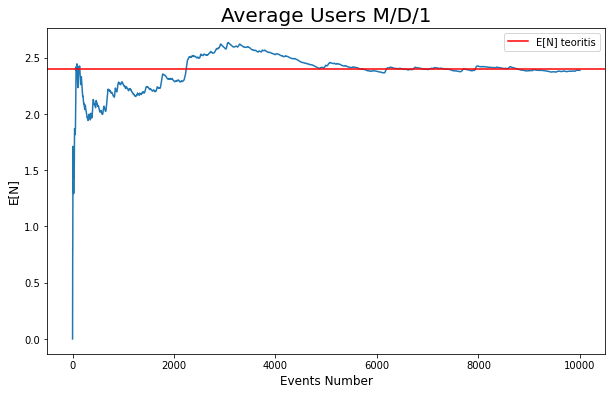

In [14]:
plt.figure(figsize=[10,6])
sns.lineplot(data.index, data['E[N]'], legend='brief')
line = plt.axhline(En_theory,
                   color='r',
                   label = 'E[N] teoritis')
plt.title("Average Users M/D/1", fontsize=20)
plt.legend(handles=[line])
plt.xlabel('Events Number', fontsize=12)
plt.ylabel('E[N]',fontsize=12)